# Introduction to Regularization for Deep Neural Nets

## Stephen Elston
## Machine Learning 410

This lesson will introduce you to the principles of regularization required to successfully train deep neural networks. In this lesson you will:

1. Understand the need for regularization of complex machine learning models, particularly deep NNs. 
2. Know how to apply constriant-based regularization using the L1 and L2 norms.
3. Understand and apply the concept of data augmentation. 
4. Know how to apply dropout regularization. 
5. Understand the advantages of various regulariztion methods and know when how to apply them in combination. 

## Why do we need regularization

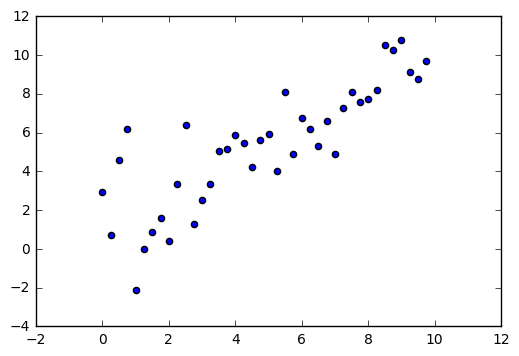

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal, seed
seed(34567)
x = np.arange(start = 0.0, stop = 10.0, step = 0.25) 
y = np.add(x, normal(scale = 2.0, size = x.shape[0]))

plt.scatter(x,y)

In [54]:
import sklearn.model_selection as ms
indx = range(len(x))
seed(9988)
indx = ms.train_test_split(indx, test_size = 20)
x_train = np.ravel(x[indx[0]])
y_train = np.ravel(y[indx[0]])
x_test = np.ravel(x[indx[1]])
y_test = np.ravel(y[indx[1]])

[ 2.18028763]


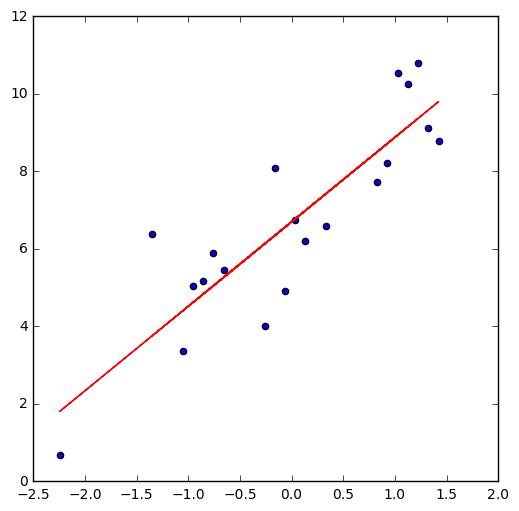

In [55]:
import sklearn.linear_model as slm
from sklearn.preprocessing import scale

def plot_reg(x, y_score, y):
    ax = plt.figure(figsize=(6, 6)).gca() # define axis
    plt.plot(x, y_score, c = 'red')
    plt.scatter(x, y)

def reg_model(x, y):
    mod = slm.LinearRegression()
    x_scale = scale(x)  # .reshape(-1, 1)
    mod.fit(x_scale, y)
    print(mod.coef_)
    return mod, x_scale, mod.predict(x_scale)

mod, x_scale, y_hat = reg_model(x_train.reshape(-1, 1), y_train)

plot_reg(x_scale, y_hat, y_train)

1.9292639905624638

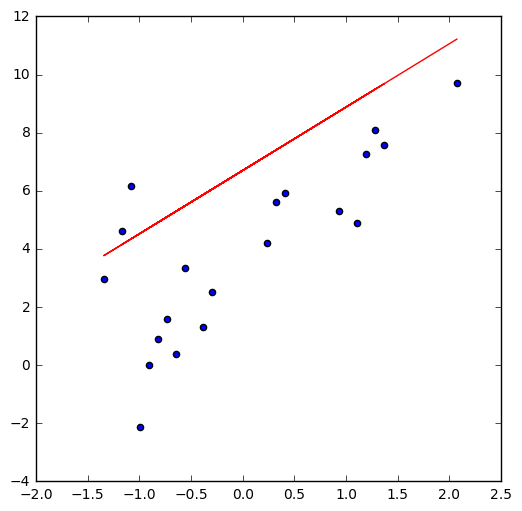

In [56]:
from math import sqrt
def test_mod(x,y, mod):
    x_scale = scale(x)
    y_score = mod.predict(x_scale)
    plot_reg(x_scale, y_score, y)
    return np.std(y_score - y)

test_mod(x_test.reshape(-1, 1), y_test, mod)

(20, 9)
[    3801.79377101   -55910.91605895   340393.61244177 -1135034.00389994
  2291726.97962741 -2884767.48230414  2217807.98144177  -954167.45864495
   176179.90377912]


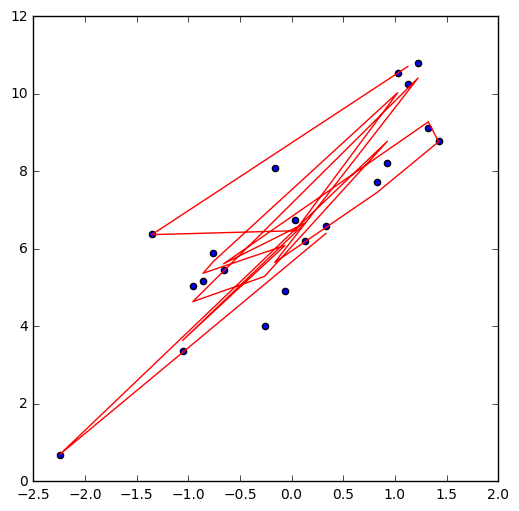

In [67]:
seed(2233)
x_power = np.power(x_train.reshape(-1, 1), range(1,10))
print(x_power.shape)

mod_power, x_power_scale, y_hat_power = reg_model(x_power, y_train)

plot_reg(x_scale, y_hat_power, y_train)

#mod_pow = slm.LinearRegression()
#mod_pow.fit(x_power, y)
#y_hat_power = mod_pow.predict(x_power)
#print(mod_pow.coef_)

#plt.plot(x_power_scale,  y_hat_power, c = 'green')
#plt.plot(x,y_hat, c = 'red')
#plt.scatter(x,y)

In [ ]:
mod_L2 = slm.Ridge(alpha = 1.0)
mod_L2.fit(x_power, y)
y_hat_L2 = mod_L2.predict(x_power)
print(mod_L2.coef_)

plt.plot(x,y_hat_L2, c = 'green')
plt.plot(x,y_hat, c = 'red')
plt.scatter(x,y)

In [ ]:
mod_L1 = slm.Lasso(alpha = 0.2, max_iter=100000)
mod_L1.fit(x_power, y)
y_hat_L1 = mod_L1.predict(x_power)
print(mod_L1.coef_)

plt.plot(x,y_hat_L1, c = 'green')
plt.plot(x,y_hat, c = 'red')
plt.scatter(x,y)